In [1]:
# %pushd book-materials
import numpy as np
import pandas as pd

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib

plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

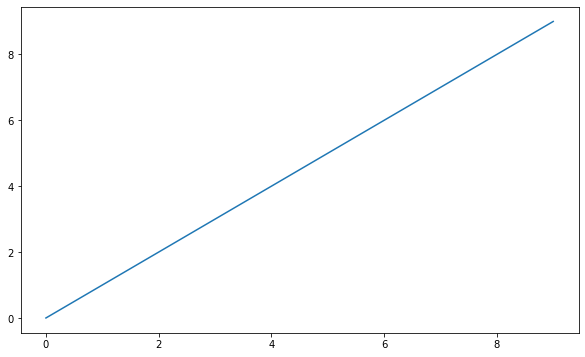

In [5]:
#Simple line plot
plt.plot(data);

# Figures and Subplots

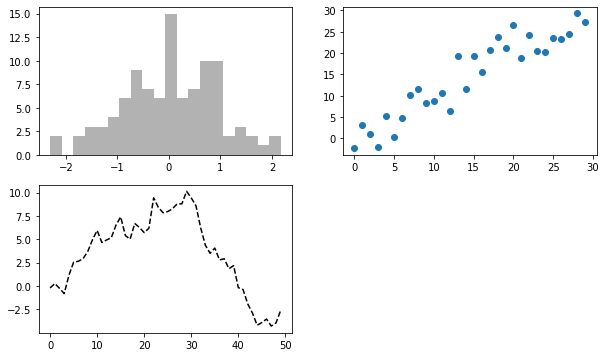

In [6]:
# Create a figure with multiple subplots
fig = plt.figure() #Plots in matplotlib reside within a Figure object
ax1 = fig.add_subplot(2, 2, 1) #add_subplot()
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# from numpy.random import randn
# plt.plot(randn(50).cumsum(),'k--'); #'k--' is a style option for a black dashed line

ax3.plot(np.random.standard_normal(50).cumsum(),color='black',linestyle='dashed') #plot() draws a line graph
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3); #hist() histogram
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30)); #scatter() scatter plot

In [7]:
plt.close("all")

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

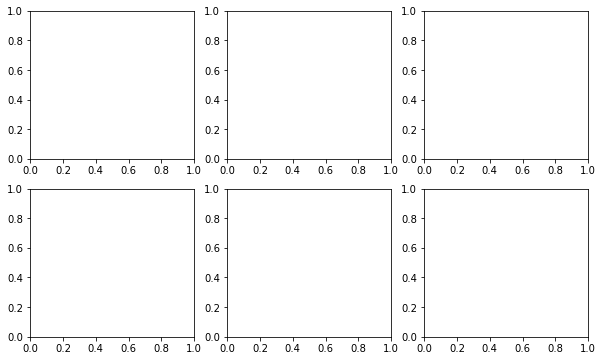

In [8]:
fig, axes = plt.subplots(2, 3)
axes

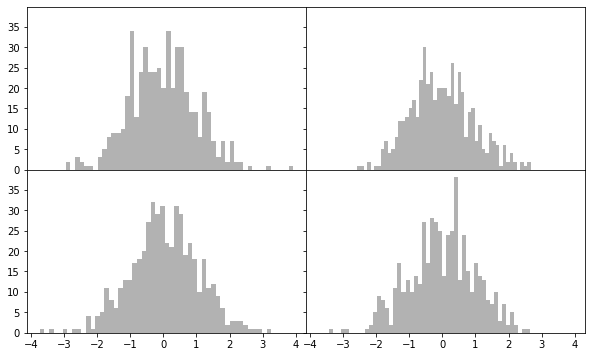

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) #subplots have the same X and Y axis using sharex & sharey

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.3)  #alpha argument: plot fill opacity (from 0 to 1)

fig.subplots_adjust(wspace=0, hspace=0) #no inter-subplot spacing

# Colors, Markers, and Line Styles

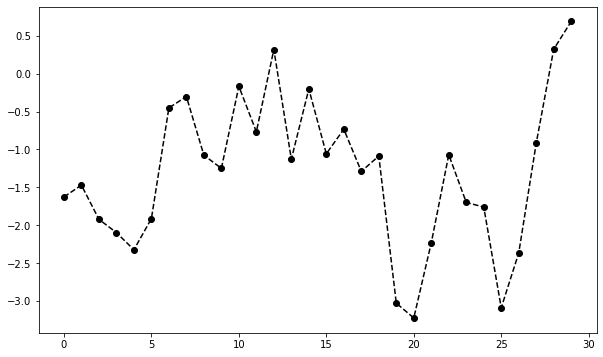

In [10]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

In [11]:
plt.close("all")

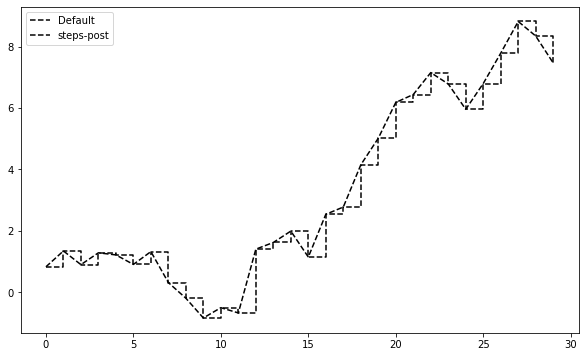

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post"); #drawstyle='steps-post' distables linearly interpolation

ax.legend();

# Ticks, Labels, and Legends

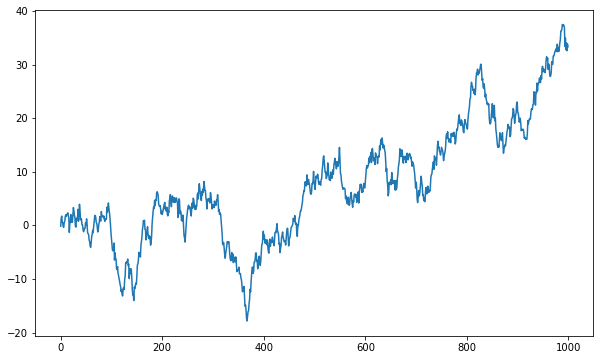

In [13]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

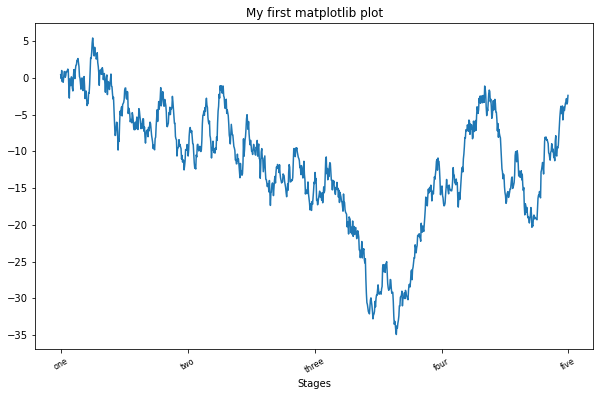

In [14]:
# xlim, xticks, and xticklabels control the plot range, tick locations, and tick labels, respectively
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

xlabel= ax.set_xlabel('Stages')
title = ax.set_title("My first matplotlib plot")

# ax.legend(); #no label defined in plot()

Text(0.5, 1.0, 'My first matplotlib plot')

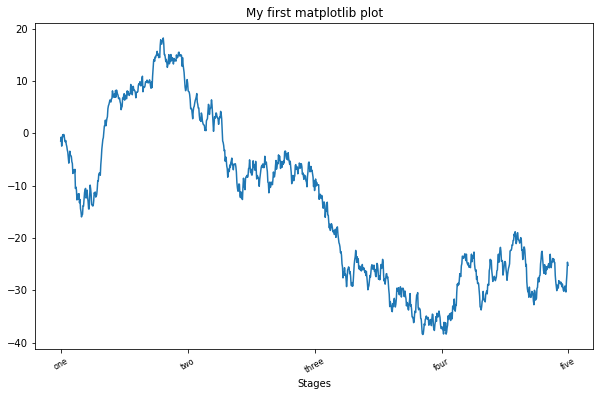

In [15]:
#No assignments of xticks, xtickslabels, set_xlabel and set_title to variables
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

ax.set_xlabel('Stages')
ax.set_title("My first matplotlib plot")

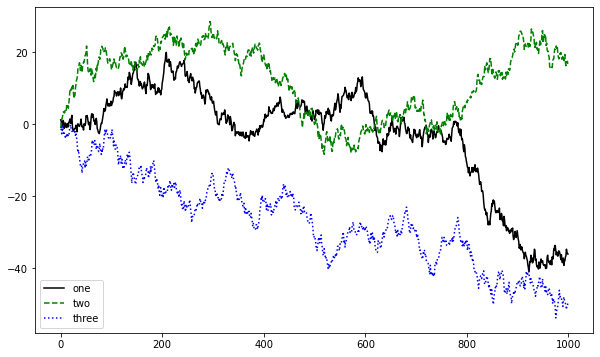

In [16]:
#Adding legends: the easiest is to pass the label argument when adding each piece of the plot
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one"); #label=
ax.plot(np.random.randn(1000).cumsum(), color="green", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dotted",
        label="three");

ax.legend(loc='best'); #loc='best' so the legned is most out of the way

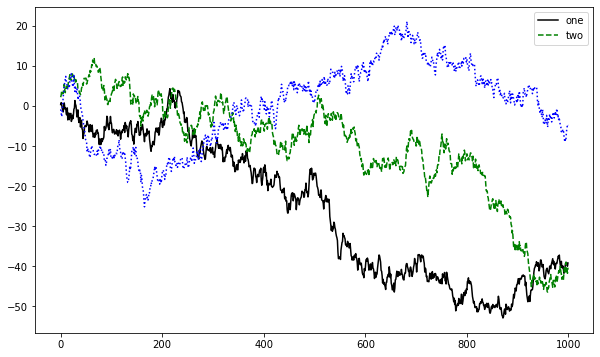

In [17]:
#To exclude one or more lements from the legend, pass no label or label="_nolegend_"
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one"); #label=
ax.plot(np.random.randn(1000).cumsum(), color="green", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dotted",
        label="_nolegend_"); #exclude from label

ax.legend(loc='best');

# Annotations and Drawing on a Subplot

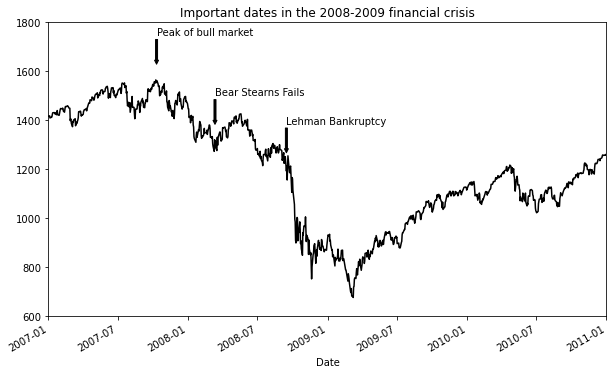

In [18]:
# plot the closing S&P 500 index price since 2007 and annotate it with some of the important dates from the 2008-2009 
# financial crisis
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data: 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),                      #annotate()
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
xlim = ax.set_xlim(["1/1/2007", "1/1/2011"])
ylim = ax.set_ylim([600, 1800])

title = ax.set_title("Important dates in the 2008-2009 financial crisis")

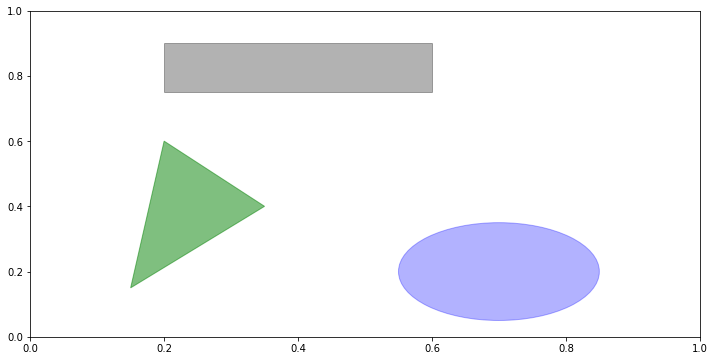

In [19]:
# To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp)
fig, ax = plt.subplots(figsize=(12, 6))

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)                #plt.Rectangle()
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)                          #plt.Circle()
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color="green", alpha=0.5)  #plt.Polygon()

ax.add_patch(rect) #add_patch()
ax.add_patch(circ)
ax.add_patch(pgon);

plt.savefig('outputs/shapes.pdf', dpi=400, bbox_inches='tight') #save plots to a pdf file

In [20]:
plt.close("all")

# matplotlib Configuration

In [21]:
plt.rc('figure', figsize=(10,10))
font_options = {'family' : 'monospace', 
                'weight' : 'bold',
#                 'size' : 'small', #ValueError: Key font.size: Could not convert 'small' to float
               } 
plt.rc('font', **font_options)

# Plotting Functions in pandas

# Line Plots

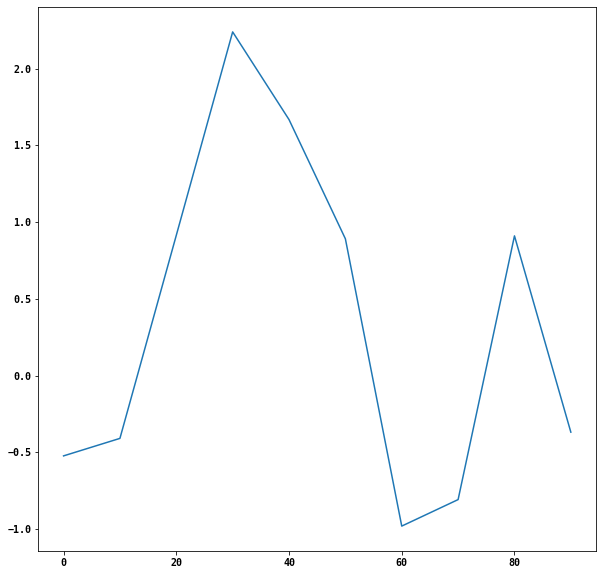

In [22]:
# The Series object’s index is passed to matplotlib for plotting on the X axis
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

s.plot();
# s.plot(use_index=False);

           A         B         C         D
0   1.734534  0.238181  1.391906  0.126324
10  0.743773  0.293029 -0.649749 -1.409563
20  0.872198  1.843114 -0.406174 -1.108929
30  2.020995  1.452308 -1.398191 -1.324458
40  0.287477  1.798595 -1.847024 -1.319828
50  2.237747  1.239771 -1.181329 -1.039368
60  3.704785  0.174645 -0.931545 -1.959358
70  4.567718 -1.256652 -2.398802 -1.382803
80  4.091924 -2.673926 -1.557586  0.030916
90  5.808807 -2.760611 -1.357424  1.961124


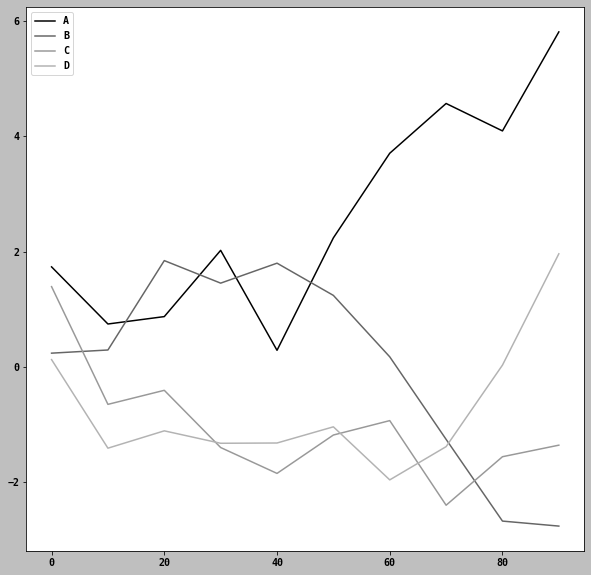

In [23]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
print(df)
plt.style.use('grayscale')

df.plot();

# Bar Plots

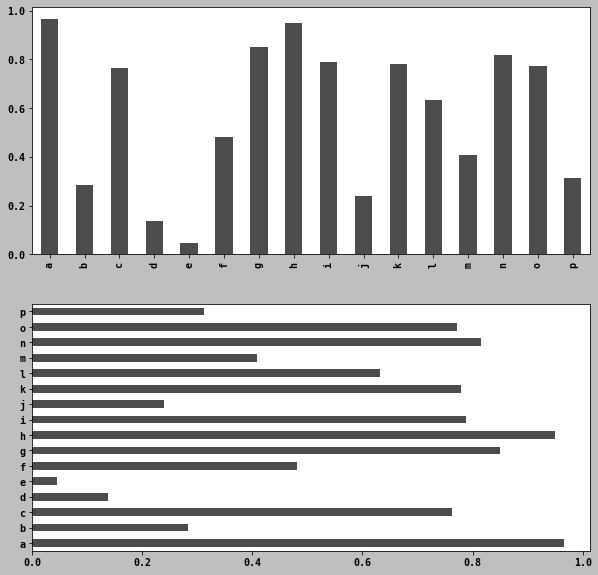

In [24]:
#plot.bar()
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7) #bar() plots vertical bars

data.plot.barh(ax=axes[1], color="black", alpha=0.7); #bar() plots horizontal bars

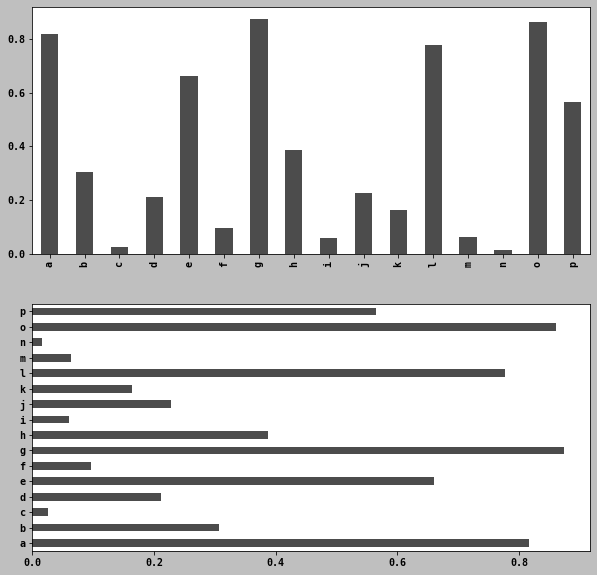

In [25]:
#plot(kind='bar'), plot(kind='barh')
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot(kind='bar', ax=axes[0], color="black", alpha=0.7) #bar() plots vertical bars

data.plot(kind='barh',ax=axes[1], color="black", alpha=0.7); #bar() plots horizontal bars

In [26]:
np.random.seed(12348)

In [27]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


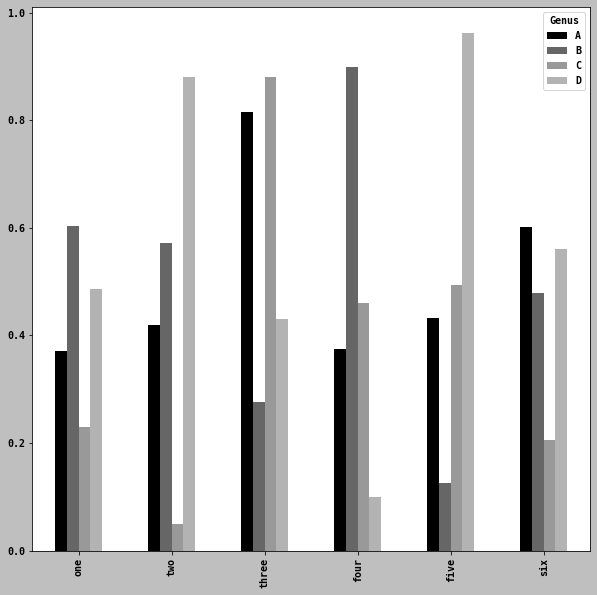

In [28]:
df.plot.bar();

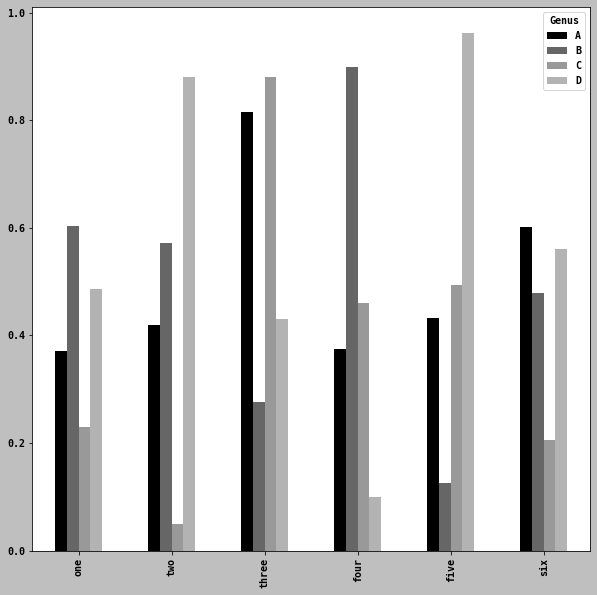

In [29]:
df.plot(kind='bar');

<Figure size 720x720 with 0 Axes>

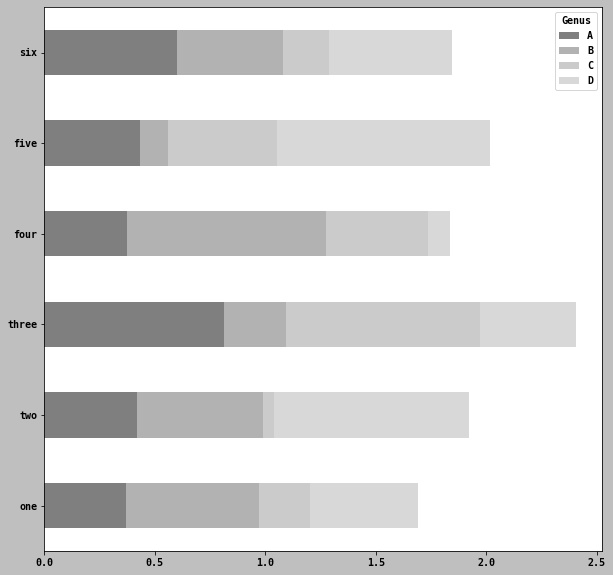

In [30]:
#stacked = True
plt.figure()

df.plot.barh(stacked=True, alpha=0.5);

In [31]:
plt.close("all")

In [32]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [33]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [34]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [35]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


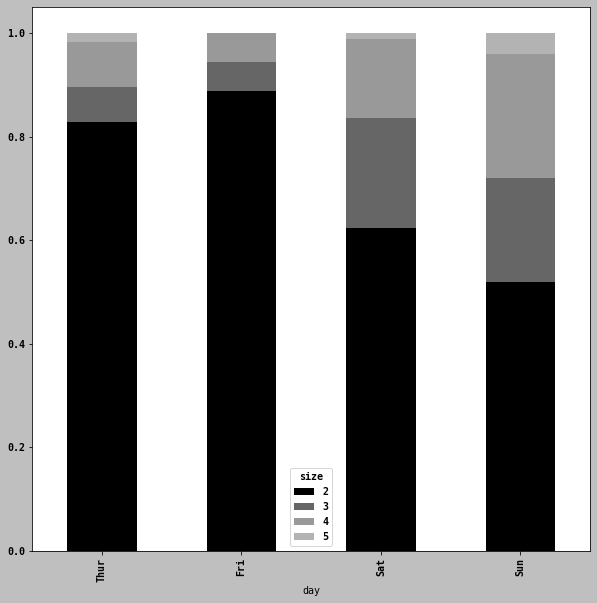

In [36]:
# Normalize to sum to 1 using div()
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts
#Fraction of parties by size within each day
party_pcts.plot.bar(stacked=True);

In [37]:
plt.close("all")

# Histograms and Density Plots

In [38]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


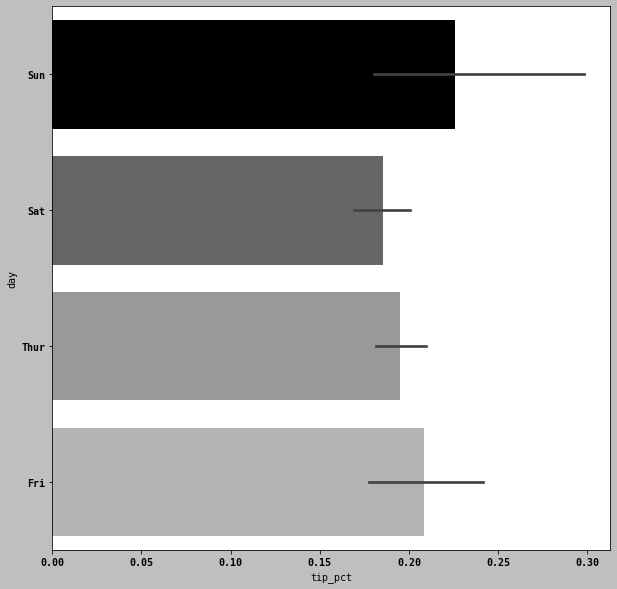

In [39]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");

In [40]:
plt.close("all")

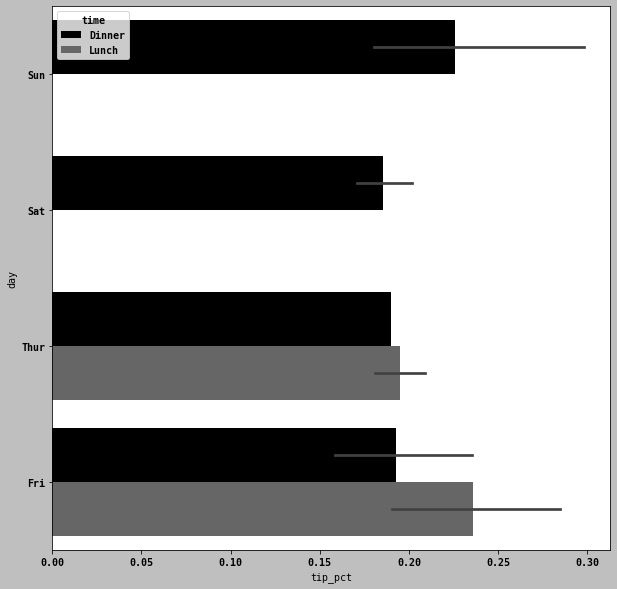

In [41]:
#Tipping percentage by day and time
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h"); #hue='time'

In [42]:
plt.close("all")

In [43]:
sns.set_style("whitegrid")

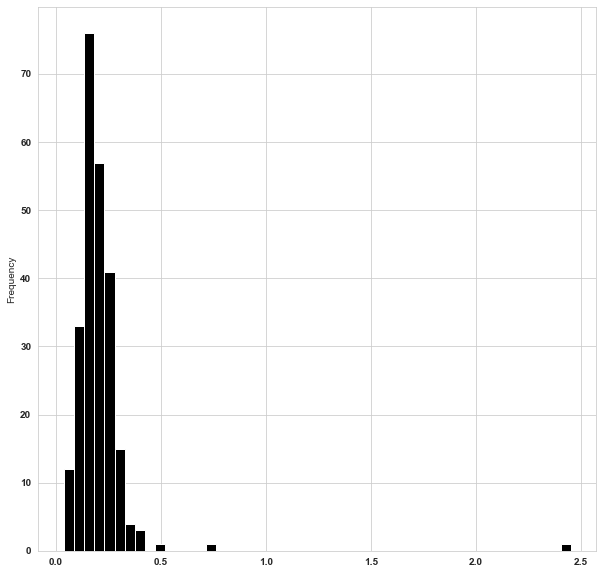

In [44]:
plt.figure()

tips["tip_pct"].plot.hist(bins=50);

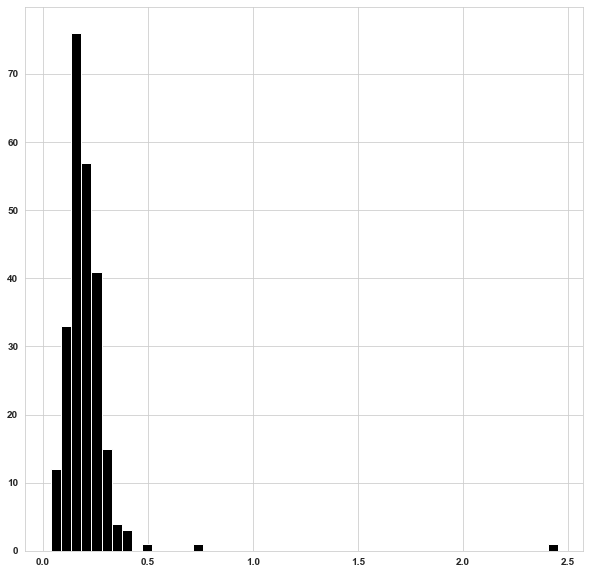

In [45]:
tips["tip_pct"].hist(bins=50);

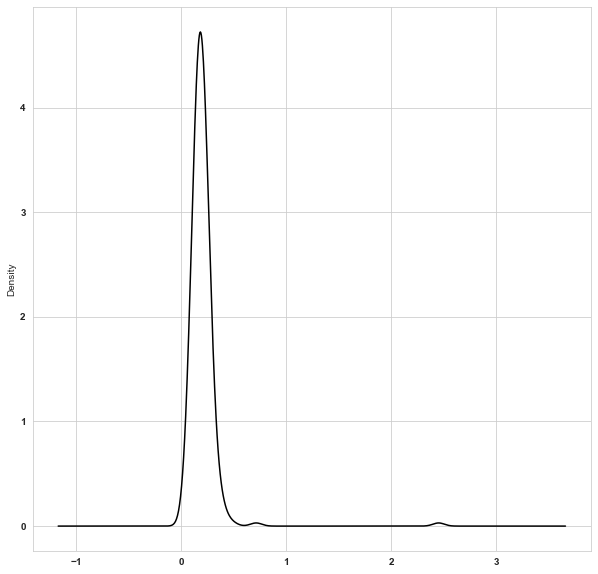

In [46]:
#Density plot of tip percentages using density()
plt.figure()

tips["tip_pct"].plot.density();

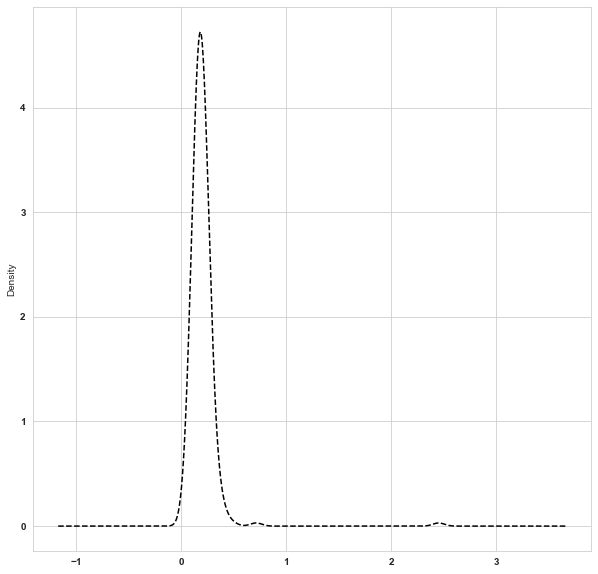

In [47]:
#Density plot of tip percentages using plot(kind='kde')
plt.figure()

tips["tip_pct"].plot(kind='kde', style='k--');

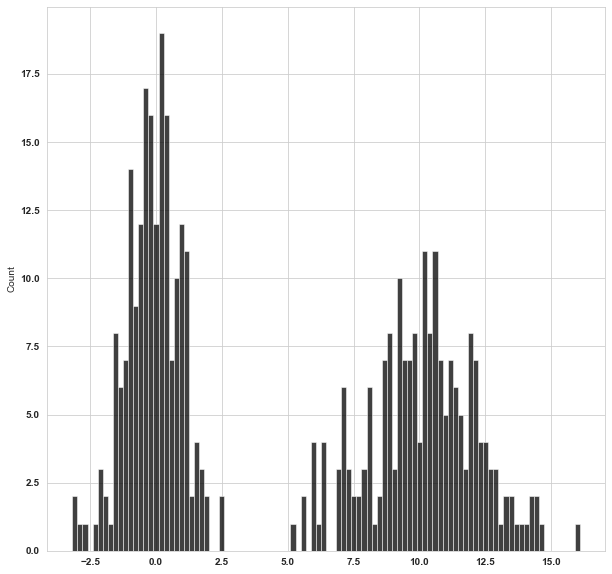

In [48]:
#sns
plt.figure()

comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

#Normalized histogram of normal mixture
sns.histplot(values, bins=100, color="black");

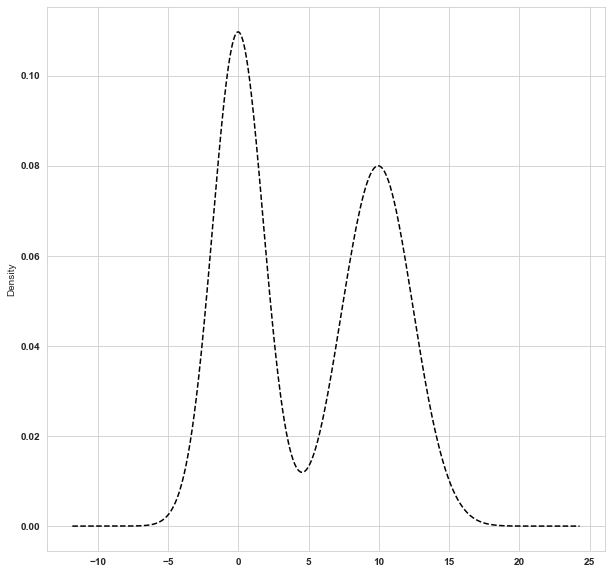

In [49]:
#plt not working as hist() returns an error
plt.figure()

comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

#Normalized histogram of normal mixture
# values.hist(bins=100, alpha=0.3, color='k', normed=True);#AttributeError:'Rectangle' object has no property 'normed'
values.plot(kind='kde', style='k--');

# Scatter Plots

In [50]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [51]:
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


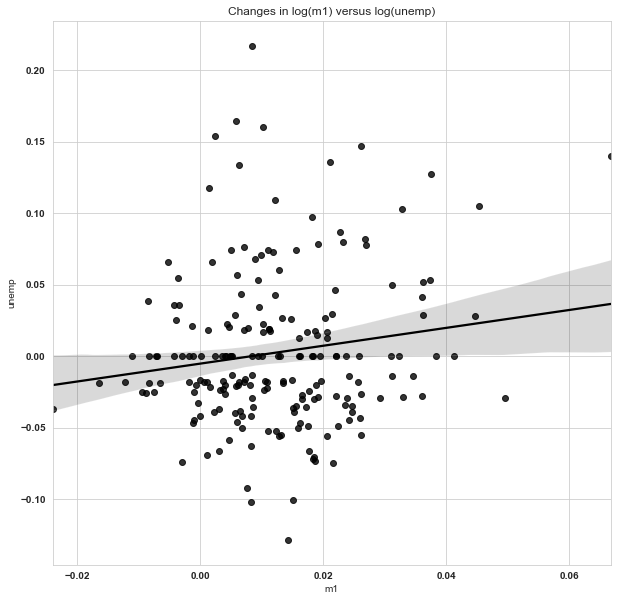

In [52]:
# regplot() - a linear regression model fit
plt.figure()
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
#! figure,id=scatter_plot_ex,width=3in,title="A seaborn regression/scatter plot"
# ax.title("Changes in log(m1) versus log(unemp)") #TypeError: 'Text' object is not callable
title = plt.title("Changes in log(m1) versus log(unemp)")

In [53]:
# scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
# NameError: name 'scatter_matrix' is not defined

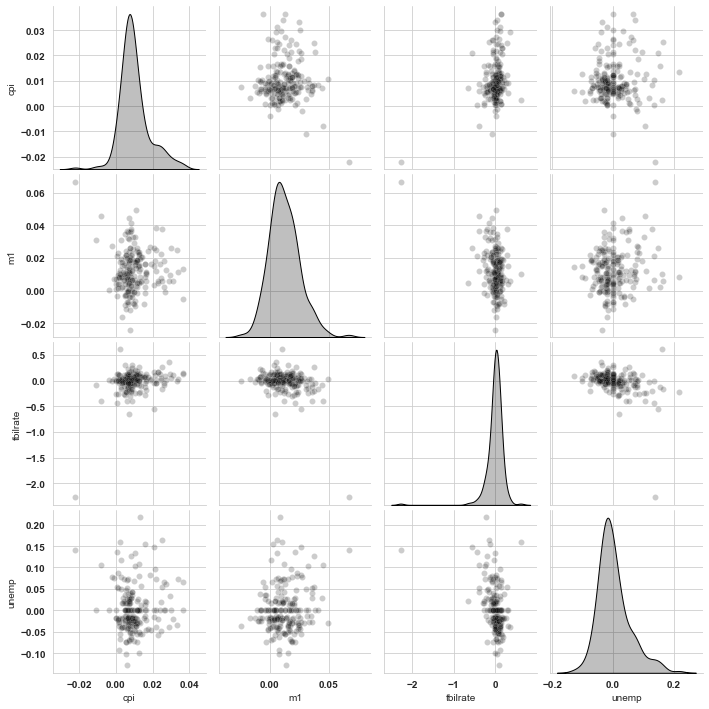

In [54]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});

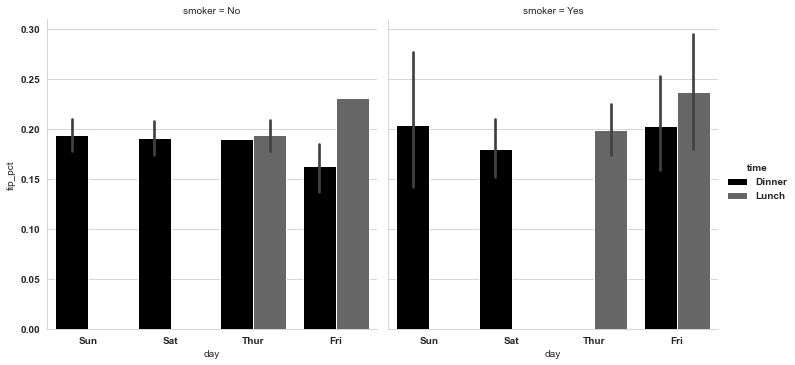

In [55]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]); #col=

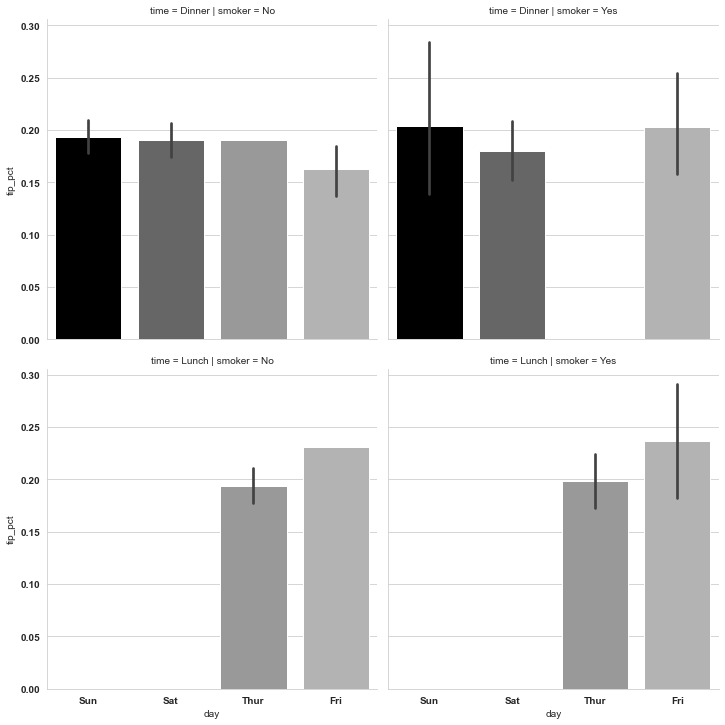

In [56]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]); #row=, col=

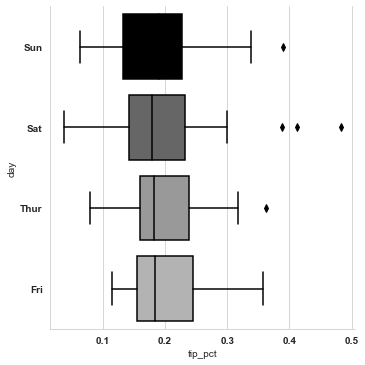

In [57]:
#catplot() creates scatterplots, bar plots, box plots, violin plots
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5]);

# Plotting Maps: Visualizing Haiti Earthquake Crisis Data

In [58]:
data = pd.read_csv('datasets/haiti/Haiti.csv')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #Jacmel #Haiti,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently needs a O- blood transfusion 4 wom...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to Haiti through your financial g...,"1. Urgences | Emergency, 2. Urgences logistiques | Vital Lines,",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during the earthquake,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to do a report so here it goes ha...,"2. Urgences logistiques | Vital Lines, 8. Autre | Other,",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga Ornelas (male-26 years old-hisp...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christian Foundation of Succor to Hai...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [59]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [60]:
data['CATEGORY'][:6]

0                         1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiques | Vital Lines, 
2           2. Urgences logistiques | Vital Lines, 8. Autre | Other, 
3                                           1. Urgences | Emergency, 
4                                           1. Urgences | Emergency, 
5                                      5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [61]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [62]:
# Cleaning the bad locations (mean+-std) and removing the missing categories is now fairly simple
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) &
            (data.LONGITUDE < -70) & data.CATEGORY.notnull()] #remove Series.notnull()
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #Jacmel #Haiti,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently needs a O- blood transfusion 4 wom...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christian Foundation of Succor to Hai...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can the government do for us in Ra...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t\nIDUshahidi: \t13688395,"4. Menaces | Security Threats, 4e. Assainissement eau et hygiene | Water san...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&quot; on map,Goodnight at (arcahaie bas Saint-Ard) 2 young boys tiga and pastor they are ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [63]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series) 
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.') 
    if '|' in names:
        names = names.split(' | ')[1] 
    return code, names.strip()

In [64]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [65]:
all_cats = get_all_categories(data.CATEGORY)
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [66]:
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [67]:
english_mapping['6c']

'Earthquake and aftershocks'

In [68]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)

code_index = pd.Index(np.unique(all_codes))

dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))),
index = data.index, columns=code_index)

In [69]:
for row, cat in zip(data.index, data.CATEGORY): 
    codes = get_code(to_cat_list(cat)) 
    dummy_frame.loc[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #Jacmel #Haiti,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently needs a O- blood transfusion 4 wom...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christian Foundation of Succor to Hai...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can the government do for us in Ra...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t\nIDUshahidi: \t13688395,"4. Menaces | Security Threats, 4e. Assainissement eau et hygiene | Water san...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&quot; on map,Goodnight at (arcahaie bas Saint-Ard) 2 young boys tiga and pastor they are ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
data['DESCRIPTION'].head()

0    Birthing Clinic in Jacmel #Haiti urgently needs a O- blood transfusion 4 wom...
4    We are working with Haitian (NGO) -The Christian Foundation of Succor to Hai...
5    i'm Louinel from Sarthe. I'd to know what can the government do for us in Ra...
6             How do we treat water in areas without Pipe?\t\nIDUshahidi: \t13688395
7    Goodnight at (arcahaie bas Saint-Ard) 2 young boys tiga and pastor they are ...
Name: DESCRIPTION, dtype: object

In [71]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance. 
    m = Basemap(ax=ax, projection='stere', lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,
    llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='f')
    # draw coastlines, state and country boundaries, edge of map. m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) 
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon) 
    cat_data = data[data['category_%s' % code] == 1]
    
    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

# Python Visualization Tool Ecosystem

Chaco

mayavi

Other Packages

The Future of Visualization Tools?

In [ ]:
# %popd

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS